In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#import pandas to read the csv file
import pandas as pd
import numpy as np

Mounted at /content/drive


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# from sklearn.externals import joblib

In [ ]:
#reading the y.txt file which contains labels
y = pd.read_csv('/content/drive/MyDrive/y.txt', sep = " ", header=None, names=["Complexity", "Node Number", "Language"])

In [ ]:
y

,Complexity,Node Number,Language
0,O(1),nodes0,C
1,O(2n),nodes0,C
2,O(2n),nodes1,C
3,O(logN),nodes0,C
4,O(logN),nodes1,C
...,...,...,...
735,O(NlogN),nodes5,Java
736,O(NlogN),nodes6,Java
737,O(NlogN),nodes7,Java
738,O(NlogN),nodes8,Java


In [ ]:
x = np.load('/content/drive/MyDrive/x.npy')

In [ ]:
x

array([[-0.05468176,  0.127175  ,  0.0366478 , ...,  0.09731236,
        -0.107657  ,  0.08184043],
       [-0.0952346 ,  0.17503381,  0.06393544, ...,  0.1181241 ,
        -0.12556435,  0.13071893],
       [-0.13581266,  0.21943617,  0.10214286, ...,  0.1283566 ,
        -0.14471857,  0.19222681],
       ...,
       [ 0.18476942, -0.20165125, -0.23536444, ...,  0.23089787,
        -0.3212845 , -0.2662279 ],
       [ 0.25568134, -0.19382419, -0.3828221 , ...,  0.27317905,
        -0.33641592, -0.30042982],
       [ 0.78257215, -0.16311097, -0.7386889 , ...,  0.5125705 ,
        -0.17265631, -0.5655121 ]], dtype=float32)

In [ ]:
df = []
for i in range(len(x)):
  emb = x[i].tolist()
  # emb.append(y[i])
  df.append(emb)
col = []
for i in range(128):
  col.append('emb'+str(i+1))
# col.append('classes')
df = pd.DataFrame(df, columns=col)

In [ ]:
df

,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,emb10,...,emb119,emb120,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128
0,-0.054682,0.127175,0.036648,0.090353,0.192498,0.043540,-0.060334,-0.037632,-0.001838,0.116995,...,-0.125052,-0.049275,-0.131080,0.002272,-0.017875,-0.209266,0.199226,0.097312,-0.107657,0.081840
1,-0.095235,0.175034,0.063935,0.117448,0.255929,0.064811,-0.072923,-0.032716,0.013575,0.152739,...,-0.191601,-0.024092,-0.185713,-0.016963,-0.040366,-0.277818,0.261729,0.118124,-0.125564,0.130719
2,-0.135813,0.219436,0.102143,0.135153,0.286394,0.068151,-0.078952,-0.003041,0.021949,0.182400,...,-0.259607,0.008541,-0.236532,-0.032249,-0.071049,-0.334604,0.334102,0.128357,-0.144719,0.192227
3,0.270222,0.300358,-0.445603,0.196632,0.531115,0.433794,-0.261992,-0.074271,-0.215854,-0.061681,...,-0.392645,-0.586666,-0.216605,-0.092687,-0.081682,-0.599847,0.550452,0.468392,-0.247837,0.087675
4,0.102710,0.177498,-0.326135,0.302662,0.256015,0.207272,-0.175998,-0.057321,0.000238,0.019773,...,-0.449514,-0.386576,-0.253997,-0.026445,-0.061492,-0.581163,0.442037,0.418021,-0.194271,0.098900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.162677,-0.179751,-0.320467,0.374476,0.487395,-0.065953,-0.380204,-0.143154,-0.065873,0.257494,...,-0.329598,-0.397525,0.117815,0.099337,-0.094519,-0.544291,0.213452,0.262748,-0.306325,-0.224609
736,0.183020,-0.166014,-0.231057,0.452174,0.562882,-0.138434,-0.443576,-0.284463,-0.054835,0.159889,...,-0.263365,-0.445122,0.000230,0.095979,-0.063981,-0.603873,0.114075,0.222806,-0.317638,-0.290131
737,0.184769,-0.201651,-0.235364,0.446800,0.547860,-0.155865,-0.472018,-0.309393,-0.079808,0.205073,...,-0.239681,-0.489142,-0.006414,0.128634,-0.109084,-0.605826,0.106701,0.230898,-0.321285,-0.266228
738,0.255681,-0.193824,-0.382822,0.447094,0.499922,-0.083941,-0.402473,-0.251599,-0.028515,0.150684,...,-0.323401,-0.498780,0.046986,0.124914,-0.117825,-0.633948,0.106924,0.273179,-0.336416,-0.300430


In [ ]:
df_y = pd.read_csv('/content/drive/MyDrive/y.txt', sep = " ", header=None, names=["Complexity", "Node Number", "Language"])

In [ ]:
df['Complexity'] = df_y['Complexity']

In [ ]:
df

,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,emb10,...,emb120,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128,Complexity
0,-0.054682,0.127175,0.036648,0.090353,0.192498,0.043540,-0.060334,-0.037632,-0.001838,0.116995,...,-0.049275,-0.131080,0.002272,-0.017875,-0.209266,0.199226,0.097312,-0.107657,0.081840,O(1)
1,-0.095235,0.175034,0.063935,0.117448,0.255929,0.064811,-0.072923,-0.032716,0.013575,0.152739,...,-0.024092,-0.185713,-0.016963,-0.040366,-0.277818,0.261729,0.118124,-0.125564,0.130719,O(2n)
2,-0.135813,0.219436,0.102143,0.135153,0.286394,0.068151,-0.078952,-0.003041,0.021949,0.182400,...,0.008541,-0.236532,-0.032249,-0.071049,-0.334604,0.334102,0.128357,-0.144719,0.192227,O(2n)
3,0.270222,0.300358,-0.445603,0.196632,0.531115,0.433794,-0.261992,-0.074271,-0.215854,-0.061681,...,-0.586666,-0.216605,-0.092687,-0.081682,-0.599847,0.550452,0.468392,-0.247837,0.087675,O(logN)
4,0.102710,0.177498,-0.326135,0.302662,0.256015,0.207272,-0.175998,-0.057321,0.000238,0.019773,...,-0.386576,-0.253997,-0.026445,-0.061492,-0.581163,0.442037,0.418021,-0.194271,0.098900,O(logN)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.162677,-0.179751,-0.320467,0.374476,0.487395,-0.065953,-0.380204,-0.143154,-0.065873,0.257494,...,-0.397525,0.117815,0.099337,-0.094519,-0.544291,0.213452,0.262748,-0.306325,-0.224609,O(NlogN)
736,0.183020,-0.166014,-0.231057,0.452174,0.562882,-0.138434,-0.443576,-0.284463,-0.054835,0.159889,...,-0.445122,0.000230,0.095979,-0.063981,-0.603873,0.114075,0.222806,-0.317638,-0.290131,O(NlogN)
737,0.184769,-0.201651,-0.235364,0.446800,0.547860,-0.155865,-0.472018,-0.309393,-0.079808,0.205073,...,-0.489142,-0.006414,0.128634,-0.109084,-0.605826,0.106701,0.230898,-0.321285,-0.266228,O(NlogN)
738,0.255681,-0.193824,-0.382822,0.447094,0.499922,-0.083941,-0.402473,-0.251599,-0.028515,0.150684,...,-0.498780,0.046986,0.124914,-0.117825,-0.633948,0.106924,0.273179,-0.336416,-0.300430,O(NlogN)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


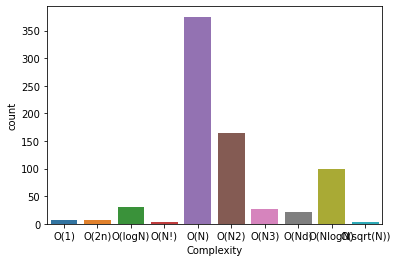

In [ ]:
import seaborn as sns
sns.countplot(df['Complexity'])

# **Resampling - Oversampling**

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['Complexity'] == 'O(N)')] 
df_minority_1 = df[(df['Complexity'] == 'O(N2)')] 
df_minority_2 = df[(df['Complexity'] == 'O(NlogN)')] 
df_minority_3 = df[(df['Complexity'] == 'O(logN)')] 
df_minority_4 = df[(df['Complexity'] == 'O(N3)')]
df_minority_5 = df[(df['Complexity'] == 'O(Nd)')]
df_minority_6 = df[(df['Complexity'] == 'O(2n)')]
df_minority_7 = df[(df['Complexity'] == 'O(1)')]
df_minority_8 = df[(df['Complexity'] == 'O(N!)')]
df_minority_9 = df[(df['Complexity'] == 'O(sqrt(N))')]

# upsample minority class
minority = [df_minority_1, df_minority_2, df_minority_3, df_minority_4, df_minority_5, df_minority_6, df_minority_7, df_minority_8, df_minority_9]
temp = []
for i in minority:
  df_minority_upsampled = resample(i, 
                                  replace=True,    # sample with replacement
                                  n_samples= 375, # to match majority class
                                  random_state=42)  # reproducible results
  temp.append(df_minority_upsampled)
# Combine majority class with upsampled minority class
df_upsampled = df_majority
for i in temp:
  df_upsampled = pd.concat([i, df_upsampled])

In [ ]:
df_upsampled['Complexity'].value_counts()

O(sqrt(N))    375
O(N!)         375
O(1)          375
O(2n)         375
O(Nd)         375
O(N3)         375
O(logN)       375
O(NlogN)      375
O(N2)         375
O(N)          375
Name: Complexity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


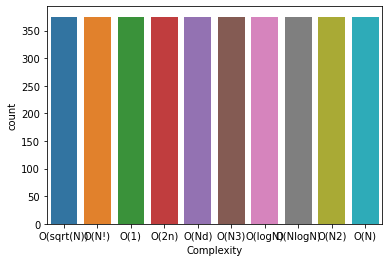

In [ ]:
sns.countplot(df_upsampled['Complexity'])

In [ ]:
df = df_upsampled
# df = oversampled
factor = pd.factorize(df['Complexity'])
df.Complexity= factor[0]
definitions = factor[1]
print(df.Complexity.head())
print(definitions)

426    0
118    0
426    0
426    0
118    0
Name: Complexity, dtype: int64
Index(['O(sqrt(N))', 'O(N!)', 'O(1)', 'O(2n)', 'O(Nd)', 'O(N3)', 'O(logN)',
       'O(NlogN)', 'O(N2)', 'O(N)'],
      dtype='object')


In [ ]:
#Splitting the data into independent and dependent variables
X = df.iloc[:,0:128].values
y = df.iloc[:,128].values
print('The independent features set: ')
print(X[:5,:])
print('The dependent variable: ')
print(y[:5])

The independent features set: 
[[-5.83184287e-02  3.71529967e-01 -2.88323965e-02  1.55028060e-01
   3.11014682e-01  1.00550026e-01  5.99360764e-02 -3.60761136e-01
   1.44105852e-01  3.35489400e-02 -3.26490730e-01 -1.46469802e-01
  -1.58249080e-01  8.42799172e-02 -1.56572074e-01 -6.25618100e-02
   1.79115199e-02 -6.21027872e-02 -4.91600335e-02  3.89916211e-01
  -1.46600425e-01  8.72108266e-02 -6.90339282e-02 -1.86637864e-01
   4.93713245e-02  4.02110219e-02  1.68428034e-01  1.20966127e-02
  -5.01116753e-01  2.01332048e-01 -1.36490002e-01 -5.06071329e-01
   1.30972713e-01  3.99992436e-01 -5.79397716e-02  2.12425098e-01
   2.67079026e-01  7.10954294e-02  3.29857349e-01  2.58917511e-01
   1.54078141e-01 -3.46699953e-01  5.03761582e-02 -1.37354985e-01
  -1.46855399e-01  2.39136890e-01  1.41890749e-01 -2.20331624e-01
   1.15752794e-01  2.84888089e-01 -1.10822842e-01 -4.63338494e-01
   2.44946837e-01  4.53784674e-01  1.73191175e-01 -9.71864909e-02
   1.07007056e-01  1.23845637e-01  4.40136716

In [ ]:
y = df['Complexity']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import pickle

In [ ]:
with open('scaler.pkl', 'wb') as files:
    pickle.dump(scaler, files)

# Bi-LSTM

In [ ]:
X_train.shape

(2812, 128)

In [ ]:
x.shape

(740, 128)

In [ ]:
# Reshaping to 3d data
x = np.reshape(x,(740,128,1))
x

array([[[-0.05468176],
        [ 0.127175  ],
        [ 0.0366478 ],
        ...,
        [ 0.09731236],
        [-0.107657  ],
        [ 0.08184043]],

       [[-0.0952346 ],
        [ 0.17503381],
        [ 0.06393544],
        ...,
        [ 0.1181241 ],
        [-0.12556435],
        [ 0.13071893]],

       [[-0.13581266],
        [ 0.21943617],
        [ 0.10214286],
        ...,
        [ 0.1283566 ],
        [-0.14471857],
        [ 0.19222681]],

       ...,

       [[ 0.18476942],
        [-0.20165125],
        [-0.23536444],
        ...,
        [ 0.23089787],
        [-0.3212845 ],
        [-0.2662279 ]],

       [[ 0.25568134],
        [-0.19382419],
        [-0.3828221 ],
        ...,
        [ 0.27317905],
        [-0.33641592],
        [-0.30042982]],

       [[ 0.78257215],
        [-0.16311097],
        [-0.7386889 ],
        ...,
        [ 0.5125705 ],
        [-0.17265631],
        [-0.5655121 ]]], dtype=float32)

In [ ]:
X_train = np.reshape(X_train,(2812, 128,1))
X_train

array([[[ 0.84717154],
        [-1.43068202],
        [-0.7615302 ],
        ...,
        [ 0.57338564],
        [-1.24922156],
        [-1.0607431 ]],

       [[-0.70294139],
        [ 1.51171662],
        [ 1.35163088],
        ...,
        [-1.72876841],
        [ 1.13807614],
        [ 1.25700401]],

       [[-0.13863078],
        [ 0.3382368 ],
        [ 0.1632765 ],
        ...,
        [-0.9246133 ],
        [ 0.27131712],
        [ 0.20767079]],

       ...,

       [[-0.62098248],
        [ 0.43026559],
        [ 0.53670856],
        ...,
        [-0.67867133],
        [ 0.24573454],
        [ 0.47407897]],

       [[ 0.76756047],
        [-0.82558813],
        [-0.87589451],
        ...,
        [ 0.31606535],
        [-0.03928964],
        [-0.89741286]],

       [[-1.22142386],
        [ 0.32847572],
        [ 0.8689637 ],
        ...,
        [ 0.42070132],
        [ 0.59613646],
        [ 1.09790722]]])

In [ ]:
y.shape

(3750,)

In [ ]:
y_train.shape

(2812,)

In [ ]:
# Reshaping to 3d data
X_test = np.reshape(X_test,(938,128,1))
X_test

array([[[-0.80095946],
        [ 1.5300145 ],
        [ 1.64063133],
        ...,
        [-0.7921705 ],
        [ 2.01342985],
        [ 1.6060777 ]],

       [[-0.70483171],
        [ 0.70026779],
        [ 0.2687184 ],
        ...,
        [-0.29498561],
        [ 0.48653534],
        [ 0.80380834]],

       [[ 2.62105617],
        [ 1.14915528],
        [ 0.53942488],
        ...,
        [ 2.97785898],
        [-1.20347416],
        [-1.25078385]],

       ...,

       [[-0.81691531],
        [ 0.80352059],
        [ 0.79806443],
        ...,
        [-0.76949691],
        [ 0.39183135],
        [ 0.49922172]],

       [[-0.58914742],
        [ 0.05921539],
        [ 0.3826984 ],
        ...,
        [-0.32164525],
        [ 0.85936094],
        [ 0.50830587]],

       [[ 3.41136046],
        [-1.24376197],
        [-4.32024901],
        ...,
        [ 3.34525232],
        [-1.6734306 ],
        [-2.53536535]]])

In [ ]:
y_test.shape

(938,)

In [ ]:
# Imports
import tensorflow as tf
from tensorflow.keras.layers import Activation,Embedding, Dense, LSTM, Bidirectional, GlobalAveragePooling1D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Adam gave best results at 83.69%

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True),
                             input_shape=(128, 1))) # 64 as input shape is 128; forward + backward = 128
model.add(Bidirectional(LSTM(64)))
model.add(Dense(10, activation="softmax")) 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #adam

In [ ]:
# Give a summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128, 128)         33792     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 133,898
Trainable params: 133,898
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=25)

Epoch 1/5
88/88 [==============================] - 21s 159ms/step - loss: 1.8824 - accuracy: 0.3169
Epoch 2/5
88/88 [==============================] - 14s 157ms/step - loss: 1.1940 - accuracy: 0.5491
Epoch 3/5
88/88 [==============================] - 16s 186ms/step - loss: 0.9799 - accuracy: 0.6358
Epoch 4/5
88/88 [==============================] - 14s 159ms/step - loss: 0.8038 - accuracy: 0.7137
Epoch 5/5
88/88 [==============================] - 15s 168ms/step - loss: 0.7426 - accuracy: 0.7258


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('try_model1.sav', save_format="h5")

In [ ]:
import pandas as pd
#data = {'Name': ['a', 'b', 'c'], 'Age': [10, 11, 12]}
table_df = pd.DataFrame(history.history)
table_df.index += 1
print(table_df)

       loss  accuracy
1  1.882375  0.316856
2  1.193998  0.549075
3  0.979861  0.635846
4  0.803770  0.713727
5  0.742591  0.725818


In [ ]:
display(table_df)

,loss,accuracy
1,1.882375,0.316856
2,1.193998,0.549075
3,0.979861,0.635846
4,0.803770,0.713727
5,0.742591,0.725818


In [ ]:
from tabulate import tabulate

In [ ]:
print(tabulate(table_df, headers = 'keys', tablefmt = 'fancy_grid'))

╒════╤══════════╤════════════╕
│    │     loss │   accuracy │
╞════╪══════════╪════════════╡
│  1 │ 1.88237  │   0.316856 │
├────┼──────────┼────────────┤
│  2 │ 1.194    │   0.549075 │
├────┼──────────┼────────────┤
│  3 │ 0.979861 │   0.635846 │
├────┼──────────┼────────────┤
│  4 │ 0.80377  │   0.713727 │
├────┼──────────┼────────────┤
│  5 │ 0.742591 │   0.725818 │
╘════╧══════════╧════════════╛


In [ ]:
print(tabulate(table_df, headers = 'keys', tablefmt = 'latex'))

\begin{tabular}{rrr}
\hline
    &     loss &   accuracy \\
\hline
  1 & 1.88237  &   0.316856 \\
  2 & 1.194    &   0.549075 \\
  3 & 0.979861 &   0.635846 \\
  4 & 0.80377  &   0.713727 \\
  5 & 0.742591 &   0.725818 \\
\hline
\end{tabular}


In [ ]:
table_df.to_csv('data.csv')
from google.colab import files
files.download("data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from matplotlib import pyplot

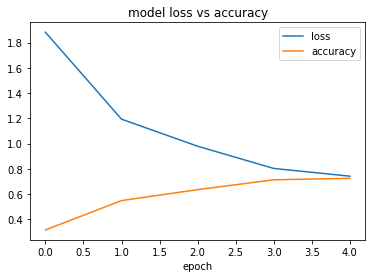

In [ ]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

30/30 - 3s - loss: 0.6620 - accuracy: 0.7793 - 3s/epoch - 89ms/step

Test accuracy: 0.7793176770210266


In [ ]:
# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=False)
#print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')
test_results

[0.6620001792907715, 0.7793176770210266]

# End of notebook

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True),
                             input_shape=(128, 1))) # 64 as input shape is 128; forward + backward = 128
model.add(Bidirectional(LSTM(64)))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=25)

Epoch 1/25
88/88 [==============================] - 33s 252ms/step - loss: 1.8601 - accuracy: 0.3115
Epoch 2/25
88/88 [==============================] - 22s 249ms/step - loss: 1.2004 - accuracy: 0.5693
Epoch 3/25
88/88 [==============================] - 24s 268ms/step - loss: 1.1234 - accuracy: 0.5843
Epoch 4/25
88/88 [==============================] - 22s 245ms/step - loss: 0.9011 - accuracy: 0.6718
Epoch 5/25
88/88 [==============================] - 22s 252ms/step - loss: 0.9618 - accuracy: 0.6586
Epoch 6/25
88/88 [==============================] - 20s 228ms/step - loss: 0.7507 - accuracy: 0.7297
Epoch 7/25
88/88 [==============================] - 21s 236ms/step - loss: 0.7088 - accuracy: 0.7464
Epoch 8/25
88/88 [==============================] - 20s 228ms/step - loss: 0.6200 - accuracy: 0.7678
Epoch 9/25
88/88 [==============================] - 21s 244ms/step - loss: 0.5806 - accuracy: 0.7987
Epoch 10/25
88/88 [==============================] - 20s 226ms/step - loss: 0.5348 - accura

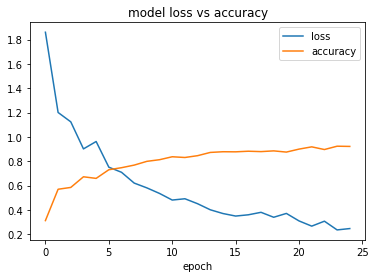

In [ ]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

30/30 - 3s - loss: 0.2713 - accuracy: 0.9211 - 3s/epoch - 109ms/step

Test accuracy: 0.9211087226867676


In [ ]:
import pandas as pd
#data = {'Name': ['a', 'b', 'c'], 'Age': [10, 11, 12]}
table_df = pd.DataFrame(history.history)
table_df.index += 1
print(table_df)

        loss  accuracy
1   1.860066  0.311522
2   1.200433  0.569346
3   1.123420  0.584282
4   0.901057  0.671764
5   0.961772  0.658606
6   0.750672  0.729730
7   0.708764  0.746444
8   0.619969  0.767781
9   0.580564  0.798720
10  0.534757  0.812233
11  0.480460  0.836415
12  0.491162  0.830370
13  0.450298  0.845306
14  0.400549  0.871977
15  0.369668  0.877667
16  0.348913  0.876956
17  0.359251  0.881935
18  0.379618  0.878734
19  0.339010  0.884780
20  0.370551  0.874822
21  0.308768  0.899360
22  0.266068  0.917852
23  0.306673  0.895804
24  0.234968  0.923186
25  0.246129  0.921408


In [ ]:
table_df2 = table_df[table_df.index % 5 == 0]
table_df2

,loss,accuracy
5,0.961772,0.658606
10,0.534757,0.812233
15,0.369668,0.877667
20,0.370551,0.874822
25,0.246129,0.921408


In [ ]:
display(table_df2)

,loss,accuracy
5,0.961772,0.658606
10,0.534757,0.812233
15,0.369668,0.877667
20,0.370551,0.874822
25,0.246129,0.921408


In [ ]:
print(tabulate(table_df, headers = 'keys', tablefmt = 'fancy_grid'))

In [ ]:
print(tabulate(table_df, headers = 'keys', tablefmt = 'latex'))

In [ ]:
table_df.to_csv('data3.csv')
from google.colab import files
files.download("data3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
88/88 [==============================] - 13s 151ms/step - loss: 0.6477 - accuracy: 0.7742
Epoch 2/200
88/88 [==============================] - 11s 120ms/step - loss: 0.7041 - accuracy: 0.7411
Epoch 3/200
88/88 [==============================] - 10s 119ms/step - loss: 0.6327 - accuracy: 0.7795
Epoch 4/200
88/88 [==============================] - 10s 119ms/step - loss: 0.5915 - accuracy: 0.7991
Epoch 5/200
88/88 [==============================] - 11s 120ms/step - loss: 0.5859 - accuracy: 0.7966
Epoch 6/200
88/88 [==============================] - 11s 120ms/step - loss: 0.7348 - accuracy: 0.7393
Epoch 7/200
88/88 [==============================] - 11s 120ms/step - loss: 0.7882 - accuracy: 0.7123
Epoch 8/200
88/88 [==============================] - 11s 121ms/step - loss: 0.6200 - accuracy: 0.7770
Epoch 9/200
88/88 [==============================] - 11s 120ms/step - loss: 0.5555 - accuracy: 0.8090
Epoch 10/200
88/88 [==============================] - 11s 130ms/step - loss: 0.625

In [ ]:
# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=False)
#print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')
test_results

[0.4467061161994934, 0.8240938186645508]

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

30/30 - 1s - loss: 0.4467 - accuracy: 0.8241 - 679ms/epoch - 23ms/step

Test accuracy: 0.8240938186645508


# Random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

{'max_depth': 14, 'max_features': 2}
0.9665631861891422


In [ ]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42,max_depth=14,max_features=1)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, max_features=1,
                       n_estimators=10, random_state=42)

In [ ]:
num_classes = len(set(df_upsampled['Complexity']))
num_classes

10

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 98,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 105,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  95,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  92,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 101,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 106,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  91,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  73,   1,   1],
       [  0,   0,   0,   0,   1,   1,   0,   1,  84,   0],
       [  0,   0,   0,   0,   0,   1,   5,   5,  12,  65]])

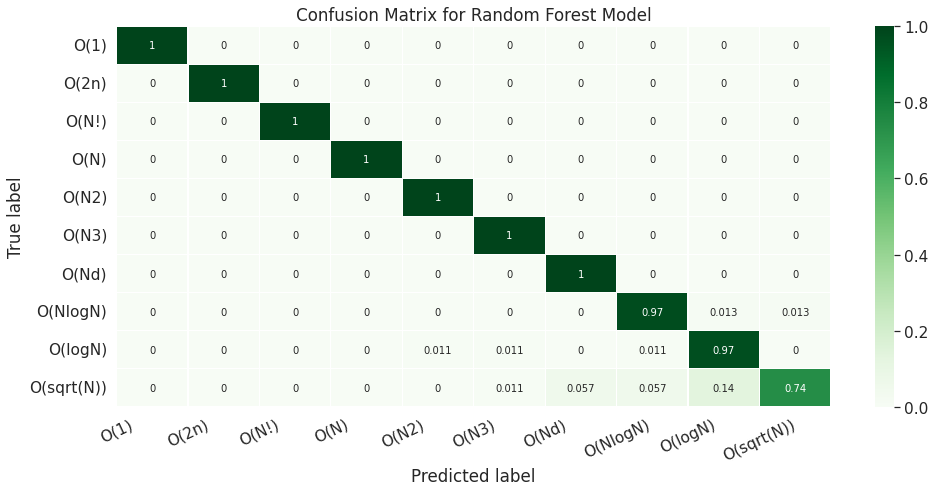

In [ ]:
# Get and reshape confusion matrix data
import matplotlib.pyplot as plt
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['O(1)',  'O(2n)',  'O(N!)',  'O(N)',  'O(N2)',  'O(N3)',  'O(Nd)',  'O(NlogN)', 'O(logN)','O(sqrt(N))']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, y_pred)

0.9701492537313433

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00        95
           3       1.00      1.00      1.00        92
           4       0.99      1.00      1.00       101
           5       0.98      1.00      0.99       106
           6       0.95      1.00      0.97        91
           7       0.92      0.97      0.95        75
           8       0.87      0.97      0.91        87
           9       0.98      0.74      0.84        88

    accuracy                           0.97       938
   macro avg       0.97      0.97      0.97       938
weighted avg       0.97      0.97      0.97       938



In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import SMOTE
# smote_obj = SMOTE()
# X_train, y_train = smote_obj.fit_resample(X_train, y_train)

In [ ]:
X_train.shape

(2812, 128)

In [ ]:
y_train.shape

(2812,)

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42,max_depth=14,max_features=1)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, max_features=1,
                       n_estimators=10, random_state=42)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
y_test

array([1, 4, 6, 1, 3, 8, 9, 2, 9, 3, 0, 1, 8, 6, 5, 5, 2, 4, 8, 3, 1, 4,
       0, 5, 1, 0, 8, 6, 4, 8, 5, 5, 1, 6, 7, 1, 4, 2, 0, 2, 7, 7, 2, 4,
       4, 7, 2, 1, 5, 7, 2, 0, 9, 5, 2, 8, 4, 3, 8, 2, 1, 2, 0, 5, 5, 6,
       2, 0, 6, 9, 3, 7, 1, 9, 0, 1, 4, 1, 3, 9, 3, 9, 1, 3, 0, 0, 8, 0,
       3, 6, 9, 4, 0, 3, 2, 3, 9, 5, 8, 1, 4, 0, 5, 5, 8, 1, 3, 8, 2, 3,
       5, 8, 9, 9, 0, 9, 5, 9, 7, 7, 4, 1, 4, 6, 7, 6, 6, 7, 5, 2, 3, 2,
       5, 5, 5, 8, 3, 1, 5, 6, 8, 1, 4, 3, 6, 0, 3, 5, 8, 1, 3, 6, 4, 7,
       2, 0, 7, 7, 3, 6, 5, 6, 5, 9, 2, 0, 3, 6, 4, 5, 7, 9, 9, 4, 4, 9,
       8, 1, 6, 5, 5, 6, 4, 1, 1, 3, 2, 2, 4, 0, 4, 6, 6, 8, 3, 1, 9, 4,
       0, 0, 3, 1, 0, 9, 8, 6, 9, 7, 8, 1, 8, 4, 6, 4, 5, 5, 1, 6, 4, 8,
       3, 1, 9, 4, 4, 8, 5, 8, 9, 2, 9, 8, 6, 4, 4, 1, 8, 2, 9, 5, 5, 1,
       9, 0, 6, 2, 9, 2, 6, 0, 2, 9, 3, 6, 2, 6, 7, 0, 1, 5, 3, 4, 0, 0,
       2, 6, 9, 9, 7, 7, 2, 0, 3, 5, 1, 8, 7, 7, 6, 3, 9, 0, 4, 3, 9, 2,
       0, 0, 1, 5, 0, 1, 9, 6, 1, 2, 5, 5, 7, 9, 4,

In [ ]:
y_pred

array([1, 4, 6, 1, 3, 8, 9, 2, 9, 3, 0, 1, 8, 6, 5, 5, 2, 4, 8, 3, 1, 4,
       0, 5, 1, 0, 8, 6, 4, 8, 5, 5, 1, 6, 7, 1, 4, 2, 0, 2, 7, 7, 2, 4,
       4, 7, 2, 1, 5, 7, 2, 0, 9, 5, 2, 8, 4, 3, 8, 2, 1, 2, 0, 5, 5, 6,
       2, 0, 6, 9, 3, 7, 1, 8, 0, 1, 4, 1, 3, 9, 3, 8, 1, 3, 0, 0, 8, 0,
       3, 6, 9, 4, 0, 3, 2, 3, 9, 5, 8, 1, 4, 0, 5, 5, 8, 1, 3, 8, 2, 3,
       5, 8, 9, 9, 0, 9, 5, 9, 7, 7, 4, 1, 4, 6, 7, 6, 6, 7, 5, 2, 3, 2,
       5, 5, 5, 8, 3, 1, 5, 6, 8, 1, 4, 3, 6, 0, 3, 5, 8, 1, 3, 6, 4, 7,
       2, 0, 7, 7, 3, 6, 5, 6, 5, 9, 2, 0, 3, 6, 4, 5, 7, 7, 9, 4, 4, 9,
       8, 1, 6, 5, 5, 6, 4, 1, 1, 3, 2, 2, 4, 0, 4, 6, 6, 8, 3, 1, 9, 4,
       0, 0, 3, 1, 0, 9, 8, 6, 9, 7, 8, 1, 8, 4, 6, 4, 5, 5, 1, 6, 4, 8,
       3, 1, 9, 4, 4, 8, 5, 8, 9, 2, 9, 8, 6, 4, 4, 1, 8, 2, 9, 5, 5, 1,
       9, 0, 6, 2, 9, 2, 6, 0, 2, 6, 3, 6, 2, 6, 7, 0, 1, 5, 3, 4, 0, 0,
       2, 6, 9, 9, 7, 7, 2, 0, 3, 5, 1, 8, 7, 7, 6, 3, 8, 0, 4, 3, 9, 2,
       0, 0, 1, 5, 0, 1, 8, 6, 1, 2, 5, 5, 7, 8, 4,

In [ ]:
accuracy = accuracy_score(y_test, y_pred) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.01%


In [ ]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,cohen_kappa_score
from sklearn import metrics
labels=['0','1','2','3','4']
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred,average='weighted'))
print(recall_score(y_test, y_pred,average='weighted'))
print(f1_score(y_test, y_pred,average='weighted'))
#print("Kappa score:" + cohen_kappa_score(y_test, y_pred,average='weighted'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00        95
           3       1.00      1.00      1.00        92
           4       0.99      1.00      1.00       101
           5       0.98      1.00      0.99       106
           6       0.95      1.00      0.97        91
           7       0.92      0.97      0.95        75
           8       0.87      0.97      0.91        87
           9       0.98      0.74      0.84        88

    accuracy                           0.97       938
   macro avg       0.97      0.97      0.97       938
weighted avg       0.97      0.97      0.97       938

0.9718741236096593
0.9701492537313433
0.9689797939943197


In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = classifier.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.9987719555756903

# Adaboost

In [ ]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=1.5,
    algorithm="SAMME",
)

In [ ]:

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.5, n_estimators=300)

In [ ]:
y_pred = bdt_real.predict(X_test) 
y_pred1 = bdt_discrete.predict(X_test) 

In [ ]:
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1,average='weighted'))
print(recall_score(y_test, y_pred1,average='weighted'))
print(f1_score(y_test, y_pred1,average='weighted'))
#print(cohen_kappa_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00        95
           3       1.00      0.78      0.88        92
           4       0.92      0.58      0.72       101
           5       0.85      0.73      0.78       106
           6       0.96      0.89      0.93        91
           7       0.66      0.65      0.66        75
           8       0.65      0.53      0.58        87
           9       0.39      0.81      0.52        88

    accuracy                           0.80       938
   macro avg       0.84      0.80      0.81       938
weighted avg       0.85      0.80      0.81       938

0.802771855010661
0.8534504944314486
0.802771855010661
0.8145437082907355


In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = bdt_real.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.7871359106907873

# XGBoost

In [ ]:
import xgboost as xgb

from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder 

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators': range(60, 220, 40),
        'learning_rate': [0.1, 0.01, 0.05]
        }
model = XGBClassifier() 
grid_search = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


Fitting 10 folds for each of 4860 candidates, totalling 48600 fits


In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)

In [ ]:

model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test) 

predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,cohen_kappa_score
from sklearn import metrics
labels=['0','1','2','3','4']
print(classification_report(y_test, y_pred))
print(precision_score(y_test, predictions,average='weighted'))
print(recall_score(y_test, predictions,average='weighted'))
print(f1_score(y_test, predictions,average='weighted'))
print(cohen_kappa_score(y_test, predictions))




In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)
print(precision_score(y_test, ypred,average='weighted'))
print(recall_score(y_test, ypred,average='weighted'))
print(f1_score(y_test, ypred,average='weighted'))
print(cohen_kappa_score(y_test, ypred))

In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = knn_clf.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,multi_class="multinomial")
clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)
y_pred 

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)
print(precision_score(y_test, y_pred,average='weighted'))
print(recall_score(y_test, y_pred,average='weighted'))
print(f1_score(y_test, y_pred,average='weighted'))
print(cohen_kappa_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = knn_clf.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

# Naive Bayes

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(X_train,y_train) 

In [ ]:
y_pred = p.predict(X_test)
y_pred 

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)
print(precision_score(y_test, y_pred,average='weighted'))
print(recall_score(y_test, y_pred,average='weighted'))
print(f1_score(y_test, y_pred,average='weighted'))
print(cohen_kappa_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = knn_clf.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo